In [40]:
!pip install detectree
!pip install DeepForest

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


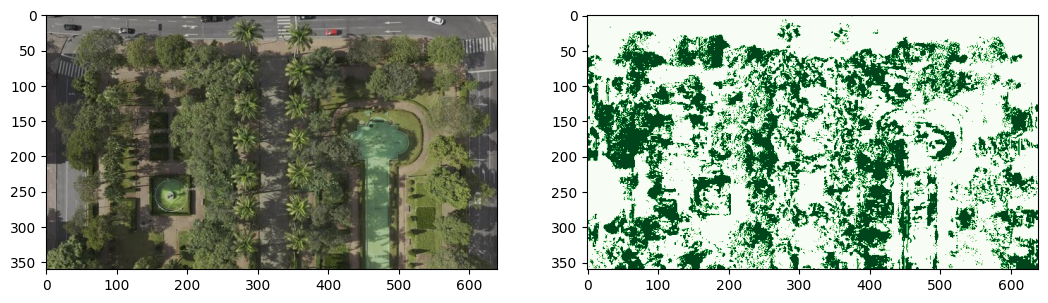

In [41]:

import detectree as dtr
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import plot

# use the pre-trained model to segment the image into tree/non-tree-pixels
tile_filename = '/content/image_praça_liberdadeBH.jpg'
y_pred = dtr.Classifier().predict_img(tile_filename)

# side-by-side plot of the tile and the predicted tree/non-tree pixels
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
with rio.open(tile_filename) as src:
    plot.show(src, ax=axes[0])
axes[1].imshow(y_pred, cmap='Greens')



In [ ]:
y_pred

array([[  0, 255,   0, ..., 255,   0, 255],
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ..., 255, 255,   0],
       ...,
       [  0,   0, 255, ...,   0,   0, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255,   0]])

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


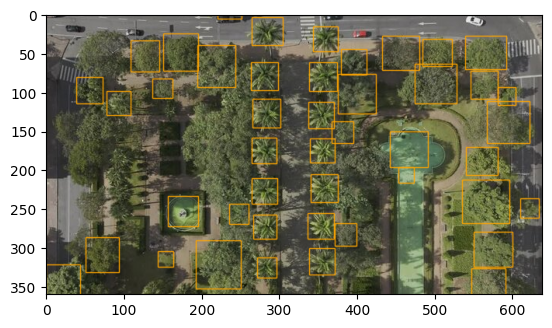

In [42]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt

model = main.deepforest()
model.use_release()

sample_image_path = get_data("/content/image_praça_liberdadeBH.jpg")
img = model.predict_image(path=sample_image_path, return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order. Many functions in deepforest will automatically perform this flip for you and give a warning.
plt.imshow(img[:,:,::-1])

In [43]:
import csv
import numpy as np
import detectree as dtr


image_path = "/content/image_praça_liberdadeBH.jpg"
image_width = 600
image_height = 350
box_size = 30

tile_filename = image_path
y_pred = dtr.Classifier().predict_img(tile_filename)

tree_positions = np.argwhere(y_pred == 255)

bounding_boxes = []

group_size = 11

for i in range(0, len(tree_positions), group_size):
    group = tree_positions[i:i+group_size]

    if len(group) == group_size:
        y, x = group[group_size // 2]
        xmin = max(0, x - box_size // 2)
        ymin = max(0, y - box_size // 2)
        xmax = min(image_width, x + box_size // 2)
        ymax = min(image_height, y + box_size // 2)

        if xmax > xmin and ymax > ymin:
          bounding_boxes.append([image_path, xmin, ymin, xmax, ymax, 'Tree'])

with open('tree_bounding_boxes.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])
    writer.writerows(bounding_boxes)

print('CSV criado com sucesso.')



https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


CSV criado com sucesso.


In [ ]:
import csv
import numpy as np
import detectree as dtr



image_path = "/content/image_praça_liberdadeBH.jpg"
image_size = 250
box_size = 10


tile_filename = "/content/image_praça_liberdadeBH.jpg"
y_pred = dtr.Classifier().predict_img(tile_filename)

tree_positions = np.argwhere(y_pred == 255)


bounding_boxes = []
group_size = 5
for i in range(0, len(tree_positions), group_size):
    group = tree_positions[i:i+group_size]
    if len(group) == group_size:
        y, x = group[group_size // 2]

        xmin = max(0, x - box_size // 2)
        ymin = max(0, y - box_size // 2)
        xmax = min(image_size, x + box_size // 2)
        ymax = min(image_size, y + box_size // 2)

        if xmax > xmin and ymax > ymin:
          bounding_boxes.append([image_path, xmin, ymin, xmax, ymax, 'Tree'])

with open('tree_bounding_boxes.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])
    writer.writerows(bounding_boxes)

print('CSV criado com sucesso.')

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


CSV criado com sucesso.


In [ ]:
# import csv
# import numpy as np
# import detectree as dtr

# # Parâmetros da imagem e do bounding box
# image_path = "/content/ibirapuera-12.jpg"
# image_width, image_height = 3000, 1600  # Dimensões da imagem (3000x1600 pixels)
# box_size = 20  # Tamanho médio do bounding box

# # Use o Detectree para fazer a segmentação da imagem
# tile_filename = "/content/ibirapuera-12.jpg"
# y_pred = dtr.Classifier().predict_img(tile_filename)

# # Encontre as posições dos pixels classificados como árvore (valor 255 em y_pred)
# tree_positions = np.argwhere(y_pred == 255)

# # Calcular bounding boxes agrupando a cada 5 pixels e usando o valor central
# bounding_boxes = []
# group_size = 137  # Número de coordenadas a serem agrupadas
# for i in range(0, len(tree_positions), group_size):
#     group = tree_positions[i:i+group_size]
#     if len(group) == group_size:  # Garante que o grupo tem o tamanho certo
#         # Pega a posição central (o terceiro item) do grupo
#         y, x = group[group_size // 2]

#         # Calcule o bounding box ao redor do ponto central
#         xmin = max(0, x - box_size // 2)
#         ymin = max(0, y - box_size // 2)
#         xmax = min(image_width, x + box_size // 2)
#         ymax = min(image_height, y + box_size // 2)

#         # Validação: descartamos o bounding box se xmax < xmin ou ymax < ymin
#         if xmax > xmin and ymax > ymin:
#             bounding_boxes.append([image_path, xmin, ymin, xmax, ymax, 'Tree'])

# # Escreva os dados no arquivo CSV
# with open('tree_bounding_boxes.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])  # Cabeçalho
#     writer.writerows(bounding_boxes)

# print('CSV criado com sucesso.')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when u

CSV criado com sucesso.


In [59]:
import os
annotations_file = get_data("/content/tree_bounding_boxes.csv")

model.config["epochs"] = 20
model.config["save-snapshot"] = False
model.config["train"]["csv_file"] = annotations_file
model.config["train"]["root_dir"] = os.path.dirname(annotations_file)

model.create_trainer()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [60]:
model.trainer.fit(model)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type                  | Params | Mode 
-------------------------------------------------------------
0 | model      | RetinaNet             | 32.1 M | eval 
1 | iou_metric | IntersectionOverUnion | 0      | train
2 | mAP_metric | MeanAveragePrecision  | 0      | train
-------------------------------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.1 M    Total params
128.592   Total estimated model params size (MB)
2         Modules in train mode
202       Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


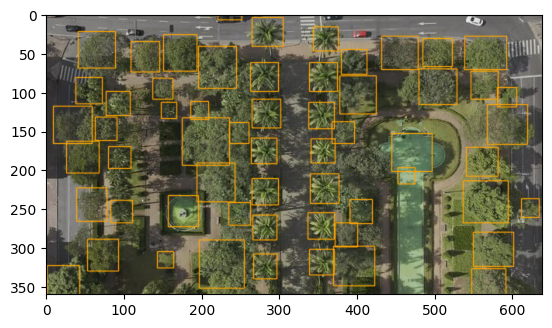

In [61]:
sample_image_path = get_data("/content/image_praça_liberdadeBH.jpg")
img = model.predict_image(path=sample_image_path, return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order. Many functions in deepforest will automatically perform this flip for you and give a warning.
plt.imshow(img[:,:,::-1])

In [62]:
predictions = model.predict_image(path=sample_image_path)
num_boxes = len(predictions)
print(f"Número Árvores: {num_boxes}")

Número Árvores: 59


In [ ]:
import torch

# Supondo que 'model' seja o seu modelo DeepForest treinado
torch.save(model.state_dict(), "deepforest_model.pth")
print("Modelo salvo com sucesso.")

Modelo salvo com sucesso.


In [63]:
from deepforest import evaluate
from deepforest import main
from deepforest import get_data
from deepforest import visualize
import os
import pandas as pd
csv_file = get_data("/content/tree_bounding_boxes.csv")
predictions = model.predict_file(csv_file=csv_file, root_dir=os.path.dirname(csv_file))
predictions.head()

Predicting: |          | 0/? [00:00<?, ?it/s]

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,539.454956,28.242399,593.594116,71.247925,0,0.817623,/content/image_praça_liberdadeBH.jpg,"POLYGON ((593.594 28.242, 593.594 71.248, 539...."
1,265.851471,109.991203,302.381958,146.678329,0,0.752647,/content/image_praça_liberdadeBH.jpg,"POLYGON ((302.382 109.991, 302.382 146.678, 26..."
2,151.595184,26.144800,194.886169,73.078842,0,0.735259,/content/image_praça_liberdadeBH.jpg,"POLYGON ((194.886 26.145, 194.886 73.079, 151...."
3,265.889954,4.711324,305.717743,41.140408,0,0.732769,/content/image_praça_liberdadeBH.jpg,"POLYGON ((305.718 4.711, 305.718 41.14, 265.89..."
4,485.951569,31.425863,523.470154,67.004105,0,0.722946,/content/image_praça_liberdadeBH.jpg,"POLYGON ((523.47 31.426, 523.47 67.004, 485.95..."


In [64]:
ground_truth = pd.read_csv(csv_file)
ground_truth.head()

,image_path,xmin,ymin,xmax,ymax,label
0,/content/image_praça_liberdadeBH.jpg,266,0,296,24,Tree
1,/content/image_praça_liberdadeBH.jpg,276,0,306,28,Tree
2,/content/image_praça_liberdadeBH.jpg,354,0,384,29,Tree
3,/content/image_praça_liberdadeBH.jpg,268,1,298,31,Tree
4,/content/image_praça_liberdadeBH.jpg,284,1,314,31,Tree


In [66]:
root_dir = os.path.dirname(csv_file)
results = model.evaluate(csv_file, root_dir, iou_threshold = 0.4)

Predicting: |          | 0/? [00:00<?, ?it/s]

In [67]:
results

{'results':      prediction_id  truth_id  IoU     score  \
 0               38         0  0.0  0.378553   
 1               52         1  0.0  0.275861   
 2             None         2  0.0       NaN   
 3             None         3  0.0       NaN   
 4             None         4  0.0       NaN   
 ...            ...       ...  ...       ...   
 6972          None      6972  0.0       NaN   
 6973          None      6973  0.0       NaN   
 6974          None      6974  0.0       NaN   
 6975          None      6975  0.0       NaN   
 6976          None      6976  0.0       NaN   
 
                                                geometry predicted_label  \
 0       POLYGON ((296 0, 296 24, 266 24, 266 0, 296 0))            Tree   
 1       POLYGON ((306 0, 306 28, 276 28, 276 0, 306 0))            Tree   
 2       POLYGON ((384 0, 384 29, 354 29, 354 0, 384 0))             NaN   
 3       POLYGON ((298 1, 298 31, 268 31, 268 1, 298 1))             NaN   
 4       POLYGON ((314 1, 314 3

In [68]:
results["box_recall"]

0.006019779274759925

In [69]:
results["box_precision"]

0.711864406779661